--- 결측치 확인 ---


행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64



--- 1. 지역별 총인구수 Top 5 ---


,행정기관,총인구수
0,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
3,경상남도,3228380
4,인천광역시,3021010


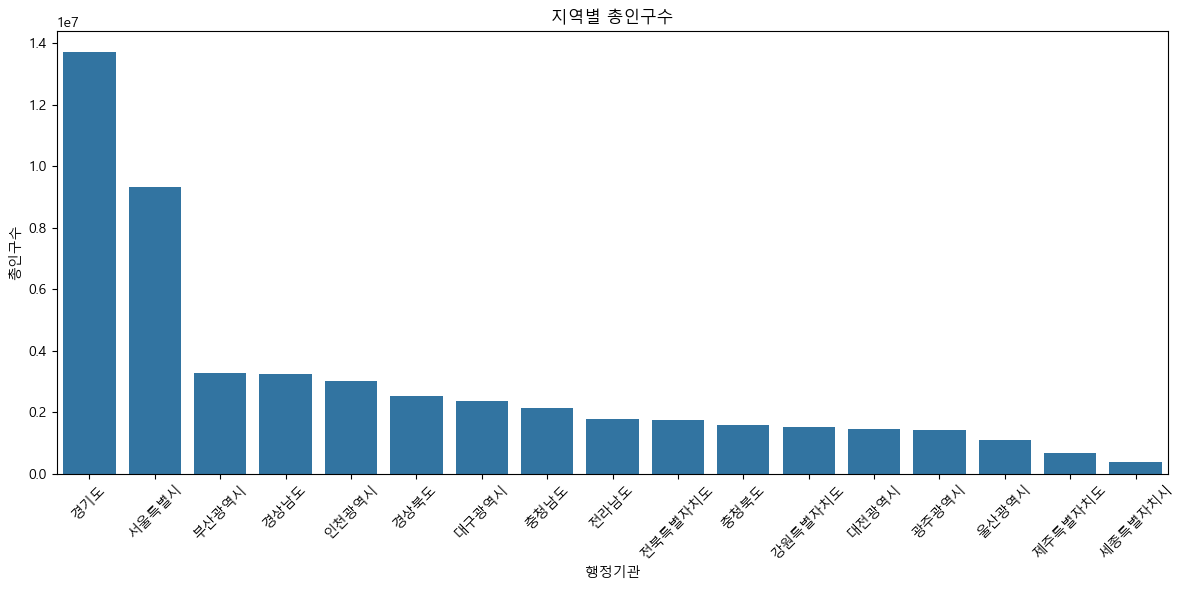

--- 2. 세대당 인구수 높은 지역 Top 5 ---


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


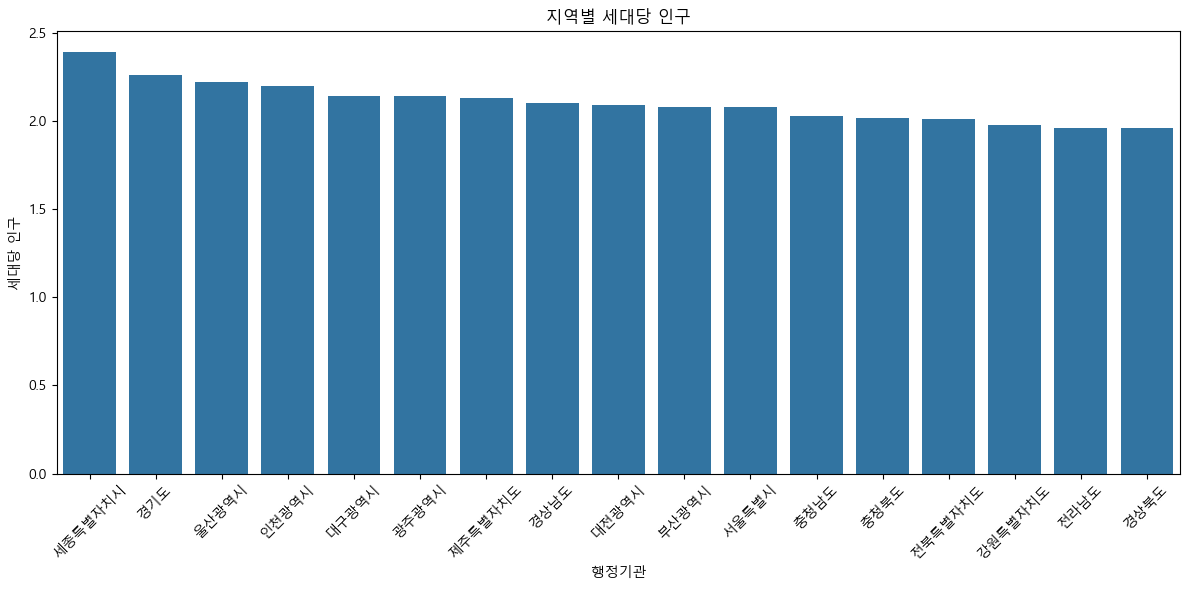

--- 3. 남녀 비율 분석 ---


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


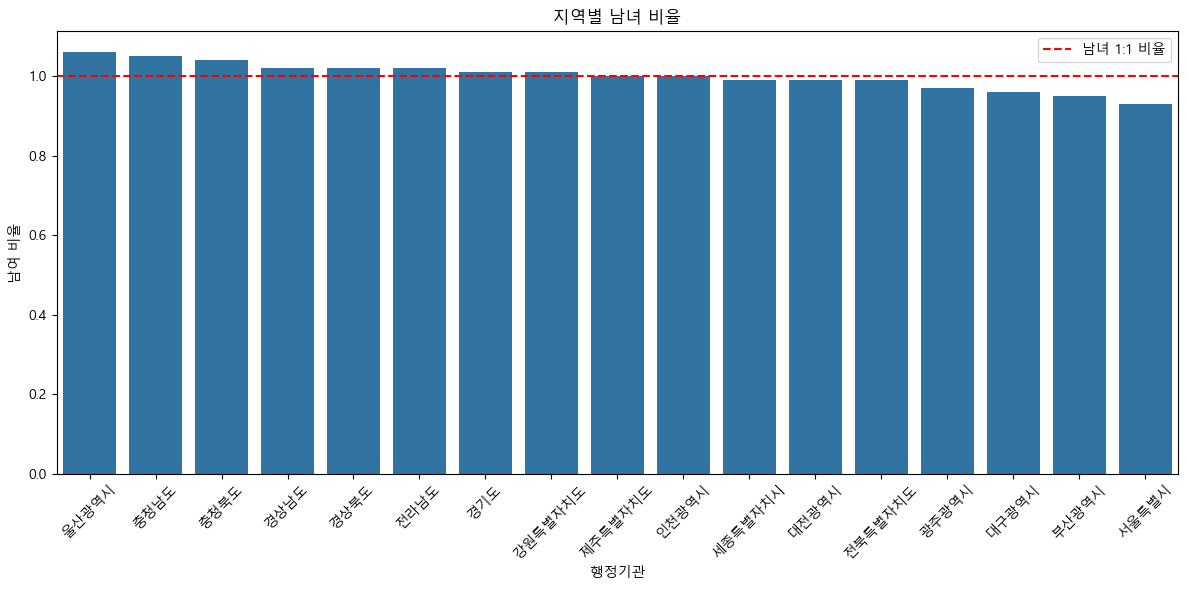

--- 4. 남초 vs 여초 지역 구분 ---


,행정기관,남여 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,동일
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초




--- 5. 세대당 인구 평균보다 높은 지역 ---
전국 평균 세대당 인구수: 2.12


,행정기관,세대당 인구
0,대구광역시,2.14
1,인천광역시,2.20
2,광주광역시,2.14
3,울산광역시,2.22
4,세종특별자치시,2.39
5,경기도,2.26
6,제주특별자치도,2.13


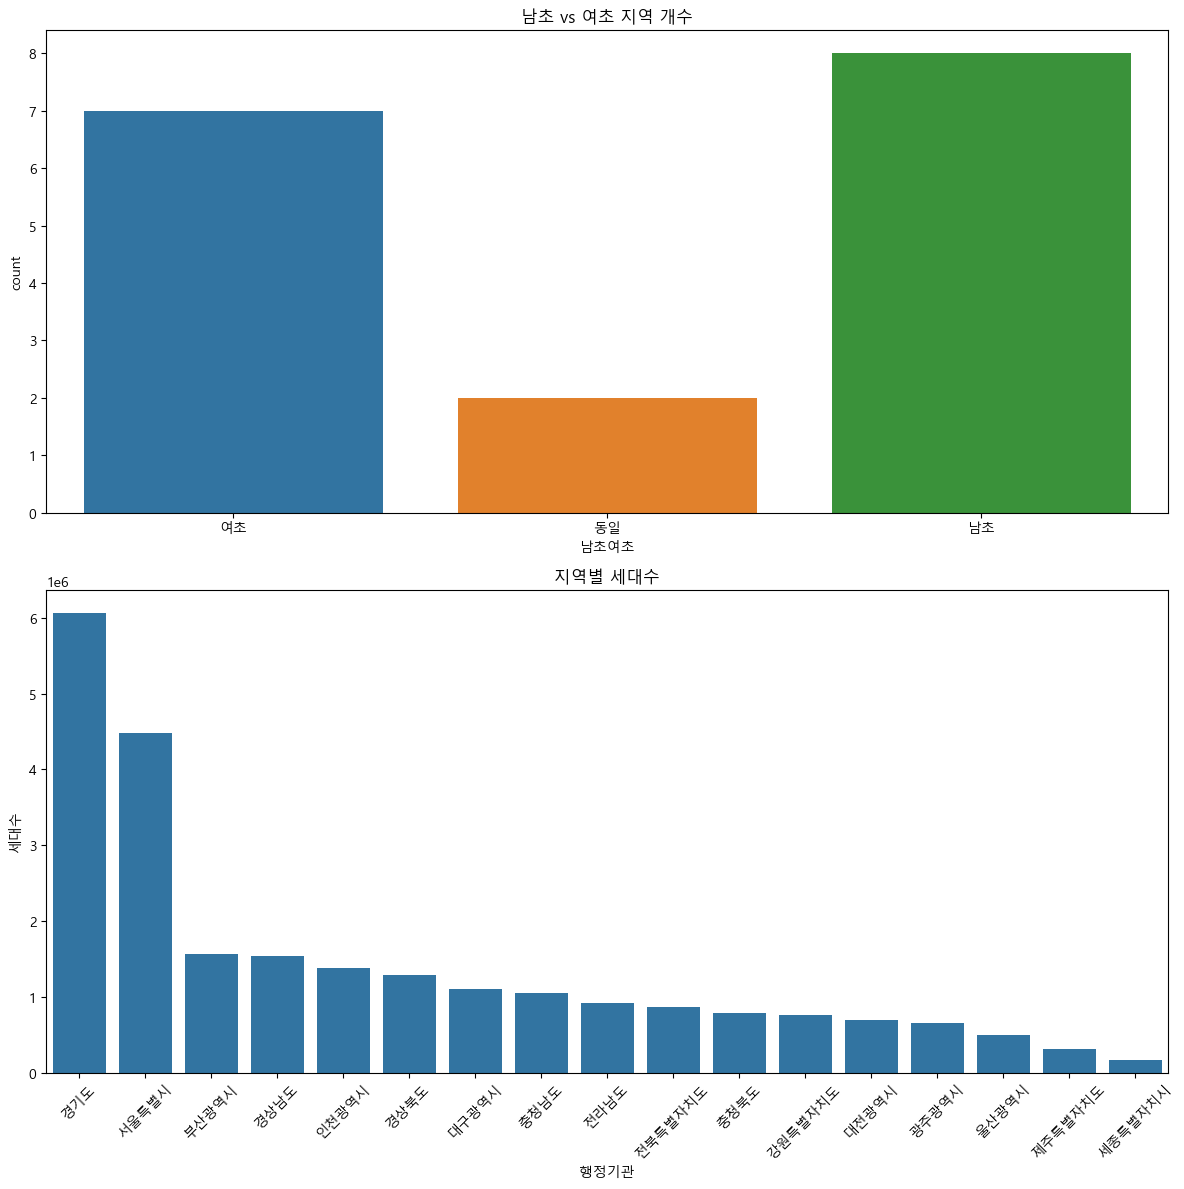

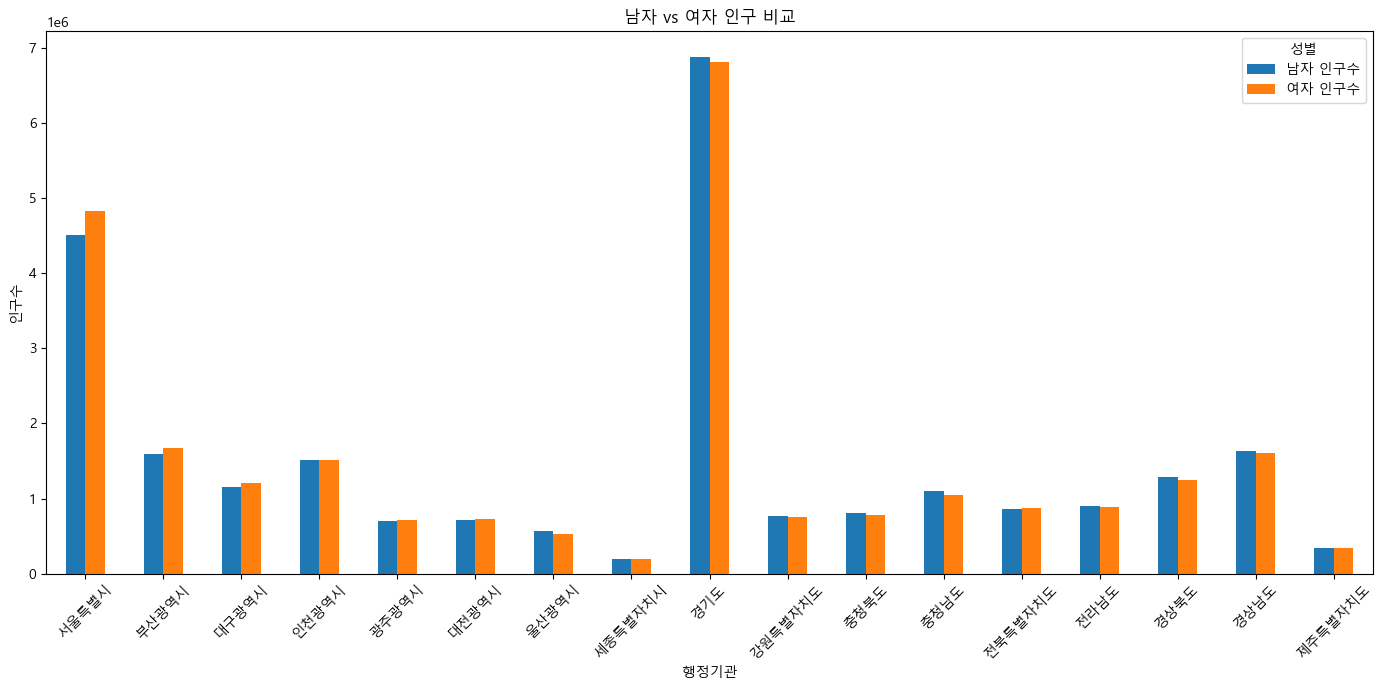

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from IPython.display import display # display 함수를 사용하기 위해 import 합니다.

# 한글 폰트 설정 (Windows의 '맑은 고딕' 기준)
# 사용자 환경에 맞는 폰트 경로를 지정해야 할 수 있습니다.
try:
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    font_prop = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_prop)
except FileNotFoundError:
    print("맑은 고딕 폰트를 찾을 수 없습니다. 시각화 결과에서 한글이 깨질 수 있습니다.")
    print("사용자 환경에 맞는 한글 폰트 경로를 설정해주세요.")

# --- 데이터 로드 및 전처리 ---
# 파일 경로는 '../data/인구현황.csv'로 가정합니다.
df_all = pd.read_csv('../data/인구현황.csv')

df = df_all[df_all['행정기관'] != '전국'].copy()

# --- 결측치 확인 ---
print("--- 결측치 확인 ---")
display(df.isnull().sum())
print("\n" + "="*50 + "\n")


# --- 1. 지역별 총인구수 분석 ---
print("--- 1. 지역별 총인구수 Top 5 ---")
# 총인구수를 기준으로 내림차순 정렬 후 상위 5개 행 선택
top5_population = df.sort_values(by='총인구수', ascending=False).head(5)
display(top5_population[['행정기관', '총인구수']].reset_index(drop=True))
print("\n" + "="*50 + "\n")


# 1-1. 지역별 총인구수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수')
plt.title('지역별 총인구수')
plt.ylabel('총인구수')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 2. 세대당 인구수 분석 ---
print("--- 2. 세대당 인구수 높은 지역 Top 5 ---")
# 세대당 인구를 기준으로 내림차순 정렬 후 상위 5개 행 선택
top5_household = df.sort_values(by='세대당 인구', ascending=False).head(5)
display(top5_household[['행정기관', '세대당 인구']].reset_index(drop=True))
print("\n" + "="*50 + "\n")


# 2-1. 지역별 세대당 인구 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='세대당 인구', ascending=False), x='행정기관', y='세대당 인구')
plt.title('지역별 세대당 인구')
plt.ylabel('세대당 인구')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 3. 남녀 비율 분석 ---
print("--- 3. 남녀 비율 분석 ---")
# 남여 비율을 기준으로 내림차순 정렬
gender_ratio = df.sort_values(by='남여 비율', ascending=False)
display(gender_ratio[['행정기관', '남여 비율']].reset_index(drop=True))
print("\n" + "="*50 + "\n")


# 3-1. 지역별 남녀 비율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_ratio, x='행정기관', y='남여 비율')
plt.axhline(y=1.0, color='red', linestyle='--', label='남녀 1:1 비율')
plt.title('지역별 남녀 비율')
plt.ylabel('남여 비율')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# --- 4. 남자초과 / 여자초과 분석 ---
print("--- 4. 남초 vs 여초 지역 구분 ---")
# 남여 비율에 따라 '남초', '여초', '동일'을 구분하는 '남초여초' 컬럼 추가
df['남초여초'] = df['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))
display(df[['행정기관', '남여 비율', '남초여초']].reset_index(drop=True))
print("\n" + "="*50 + "\n")


# --- 5. 세대당 인구 평균보다 높은 지역 분석 ---
# 전국 평균 세대당 인구수 추출
avg_household_pop = df_all[df_all['행정기관'] == '전국']['세대당 인구'].values[0]
print(f"--- 5. 세대당 인구 평균보다 높은 지역 ---")
print(f"전국 평균 세대당 인구수: {avg_household_pop}")
# 전국 평균보다 세대당 인구가 많은 지역 필터링
above_avg_household = df[df['세대당 인구'] > avg_household_pop]
display(above_avg_household[['행정기관', '세대당 인구']].reset_index(drop=True))
print("\n" + "="*50 + "\n")


# --- 5-1. 추가 분석 시각화 ---
# 남초 vs 여초 지역 개수 및 지역별 세대수 시각화
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# 남초 vs 여초 개수 Plot
sns.countplot(data=df, x='남초여초', ax=ax1, order=['여초', '동일', '남초'], hue='남초여초')
ax1.set_title('남초 vs 여초 지역 개수')
ax1.set_xlabel('남초여초')
ax1.set_ylabel('count')

# 지역별 세대수 Plot
sns.barplot(data=df.sort_values('세대수', ascending=False), x='행정기관', y='세대수', ax=ax2)
ax2.set_title('지역별 세대수')
ax2.set_xlabel('행정기관')
ax2.set_ylabel('세대수')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# --- 6. 남자 인구 vs 여자 인구 비교 시각화 ---
# '행정기관'을 인덱스로 설정하여 남자/여자 인구수 그룹 বার 플롯 생성
df.set_index('행정기관')[['남자 인구수', '여자 인구수']].plot(kind='bar', figsize=(14, 7))
plt.title('남자 vs 여자 인구 비교')
plt.ylabel('인구수')
plt.xlabel('행정기관')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()